# 1. 라이브러리 임포트

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import *

C:\Users\User\anaconda3\envs\tf\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv("Total_Data_1.csv")

# 2. Base Model 구축을 위한 실험

## 2.1 데이터 준비

### 2.1.1사용할 Feature 선택 

In [3]:
train_df = df[[   'content_cnt','content_line', 'quote_cnt',
       'img_cnt', '솔직 빈도 수', '비교 빈도 수', 'ㅋ 빈도 수', 'ㅋㅋ 빈도 수', 'ㅋㅋㅋ 빈도 수',
       'ㅋㅋㅋㅋ 빈도 수', '... 빈도 수', '.... 빈도 수', 'ㅜ 빈도 수', 'ㅜㅜ 빈도 수', 'ㅜㅜㅜ 빈도 수',
       'ㅜㅜㅜㅜ 빈도 수', 'ㅠ 빈도 수', 'ㅠㅠ 빈도 수', 'ㅠㅠㅠ 빈도 수', 'ㅠㅠㅠㅠ 빈도 수', '장점 빈도 수',
       '단점 빈도 수', '비속어 빈도 수', '허락 키워드', '내돈내산 키워드', '리얼후기 키워드', '협찬 키워드',
       '체험단 키워드', 'coupa.ng 키워드', '< 키워드', '> 키워드', '♡ 키워드', '♥ 키워드',
       '구매후기 키워드', '한달 키워드', '두달 키워드', '세달 키워드', '광고 분류1', '광고 분류2']]

In [4]:
train_df.columns = ['content_cnt', 'content_line', 'quote_cnt', 'img_cnt', '솔직 빈도 수',
       '비교 빈도 수', 'ㅋ 빈도 수', 'ㅋㅋ 빈도 수', 'ㅋㅋㅋ 빈도 수', 'ㅋㅋㅋㅋ 빈도 수', '... 빈도 수',
       '.... 빈도 수', 'ㅜ 빈도 수', 'ㅜㅜ 빈도 수', 'ㅜㅜㅜ 빈도 수', 'ㅜㅜㅜㅜ 빈도 수', 'ㅠ 빈도 수',
       'ㅠㅠ 빈도 수', 'ㅠㅠㅠ 빈도 수', 'ㅠㅠㅠㅠ 빈도 수', '장점 빈도 수', '단점 빈도 수', '비속어 빈도 수',
       '허락 키워드', '내돈내산 키워드', '리얼후기 키워드', '협찬 키워드', '체험단 키워드', 'coupa.ng 키워드',
       'small 키워드', 'big 키워드', '♡ 키워드', '♥ 키워드', '구매후기 키워드', '한달 키워드', '두달 키워드',
       '세달 키워드', '광고 분류1', '광고 분류2']

### 2.1.2 X와 Y 특징 추출

In [5]:
X = train_df.drop(['광고 분류1', '광고 분류2'],axis=1)
y = train_df['광고 분류2']

### 2.1.3 데이터 분포 확인

In [6]:
y.value_counts()

0    1980
2     373
1     172
Name: 광고 분류2, dtype: int64

### 2.1.4 Train과 Test 데이터셋 분리.
* __0.3 비율로 Test 데이터 분리__

In [7]:
x_train,x_test, y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,shuffle=True)

In [52]:
x_train.shape, x_test.shape

((1767, 37), (758, 37))

## 2.2 모델실험

In [8]:
result = {}

# 모델 선언
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
lg_model = LogisticRegression(random_state=42)
xgb_model = XGBClassifier(max_depth =3,random_state=42)

In [11]:
# 교차 검증을 통한 정확도 비교
dt_score = cross_val_score(dt_model,x_train,y_train,scoring='accuracy',cv=5)
result["DT"] = [dt_score.mean()]

dt_score = cross_val_score(rf_model,x_train,y_train,scoring='accuracy',cv=5)
result["Rf"] = [dt_score.mean()
]
dt_score = cross_val_score(lg_model,x_train,y_train,scoring='accuracy',cv=5)
result["lg"] =[ dt_score.mean()]

dt_score = cross_val_score(xgb_model,x_train,y_train,scoring='accuracy',cv=5)
result["XGB"] =[ dt_score.mean()]

C:\Users\User\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

[23:10:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:10:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:10:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:10:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:10:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,DT,Rf,lg,XGB
0,0.734598,0.824574,0.801929,0.830798


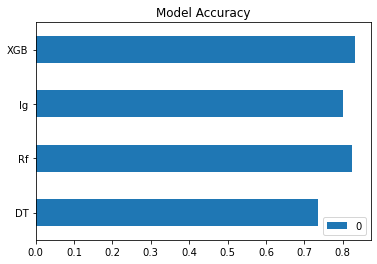

In [15]:
pd.DataFrame(result).T.plot(kind="barh",title="Model Accuracy");

display(pd.DataFrame(result))

__교차 검증된 결과 XGB 모델이 정확도 83로 평가된다.__

## 2.3 최종 선택된 모델 학습

In [16]:
# 모델 선언
xgb_model = XGBClassifier(max_depth =3,random_state=42)

# 모델 학습
xgb_model.fit(x_train,y_train)

C:\Users\User\anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:13:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

## 2.4 모델 평가

In [17]:
# 테스트 데이터 예측
y_pred = xgb_model.predict(x_test)

In [18]:
# 정확도 측정
accuracy_score(y_test,y_pred)

0.837730870712401

In [19]:
# 분류 성과표 확인
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       594
           1       0.60      0.06      0.11        52
           2       0.67      0.55      0.60       112

    accuracy                           0.84       758
   macro avg       0.71      0.52      0.54       758
weighted avg       0.82      0.84      0.81       758



In [20]:
# 오차 행렬 확인
confusion_matrix(y_test,y_pred)

array([[570,   0,  24],
       [ 42,   3,   7],
       [ 48,   2,  62]], dtype=int64)

__결과__
<br>
정확도는 84이며, 쿠팡 파트너스를 판단하는 비율이 낮다. 대신 협찬 체험단 등 제품을 대여 받아서 광고성 글의 재현율은 이전에 비해서 약 0.47 상승하였다. 룰 베이스를 적용하는 것보다, 광고성 글을 잘 판단될 것으로 판단된다.

## 모델 저장.

In [21]:
import joblib

In [22]:
joblib.dump(xgb_model,"base_model.pkl")

['base_model.pkl']

# 3. 이진 분류 모델 구축

## 3.1 y 데이터 셋에 대해서 이진 데이터로 변경

In [40]:
y_train1 = (y_train != 0)
y_test1 = (y_test != 0)

## 3.2 이진 분류 모델 실험

In [41]:
result = {}

# 모델 선언
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
lg_model = LogisticRegression(random_state=42)
xgb_model = XGBClassifier(max_depth =3,random_state=42)

In [42]:
# 교차 검증을 통한 정확도 비교
dt_score = cross_val_score(dt_model,x_train,y_train1,scoring='accuracy',cv=5)
result["DT"] = [dt_score.mean()]

dt_score = cross_val_score(rf_model,x_train,y_train1,scoring='accuracy',cv=5)
result["Rf"] = [dt_score.mean()
]
dt_score = cross_val_score(lg_model,x_train,y_train1,scoring='accuracy',cv=5)
result["lg"] =[ dt_score.mean()]

dt_score = cross_val_score(xgb_model,x_train,y_train1,scoring='accuracy',cv=5)
result["XGB"] =[ dt_score.mean()]

C:\Users\User\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

[23:26:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\User\anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_labe

[23:26:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [43]:
pd.DataFrame(result)

,DT,Rf,lg,XGB
0,0.750988,0.822312,0.810983,0.830797


## 3.3 최종 모델로 학습

In [44]:
# 모델 선언
xgb_model_b = XGBClassifier(max_depth =3,random_state=42)

# 모델 학습
xgb_model_b.fit(x_train,y_train1)

[23:26:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\envs\tf\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## 3.4 모델 평가

In [45]:
# 테스트 데이터 예측
y_pred1 = xgb_model_b.predict(x_test)

In [46]:
# 정확도 측정
accuracy_score(y_test1,y_pred1)

0.8430079155672823

In [47]:
# 분류 성과표 확인
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

       False       0.87      0.94      0.90       594
        True       0.70      0.48      0.57       164

    accuracy                           0.84       758
   macro avg       0.78      0.71      0.74       758
weighted avg       0.83      0.84      0.83       758



In [49]:
# 오차 행렬 확인
confusion_matrix(y_test1,y_pred1)

array([[560,  34],
       [ 85,  79]], dtype=int64)

__결과__
<br>
정확도는 84이며, 1에 대한 재현율이 0.48로 rule base보다 훨씬 낫지만 성능 개선이 필요해 보인다.

In [50]:
joblib.dump(xgb_model_b,"base_model_binary.pkl")

['base_model_binary.pkl']